In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from pandas.core.algorithms import duplicated

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_final = pd.read_excel('/content/drive/MyDrive/Carga X Temperatura - ONS (1).xlsx')

In [5]:
df_final.head()

,Estação,População,PIB pc,salario medio mensal,area_territorial_2021,% Industrial (Em MWh),% Comércio e Serviços (Em MWh),% Rural (Em MWh),% Residencial (Em MWh),% Iluminação e Serviços Públicos e Outros (Em MWh),Unnamed: 10,Nome da base ONS,validador,Unnamed: 13,Concessão
0,São Paulo,11253503,62341.21,41,1521202,14100892,53693815,11688,55022364,15128338,NaN,São Paulo - Mirante de Santana,False,São Paulo - Mirante de Santana,SP-ELETROPAULO
1,Bauru,343937,40668.42,26,667684,839421,1332884,46810,1823814,599509,NaN,Bauru,True,Bauru,SP-CPFL PAULISTA
2,Campos do Jordão,47789,25312.30,18,289981,78357,202459,3088,275909,79337,NaN,Campos do Jordão,True,Campos do Jordão,SP-ELEKTRO
3,Presidente Prudente,207610,36663.15,24,560637,387760,953907,39779,1117855,402754,NaN,Presidente Prudente,True,Presidente Prudente,SP-ENERGISA SSE-SP
4,Franca,318640,28787.49,20,605679,686909,708625,42331,1558035,515551,NaN,Franca,True,Franca,SP-CPFL PAULISTA


In [6]:
std = StandardScaler()
mmax = MinMaxScaler()

In [7]:
df1 = df_final.drop(columns= ['Estação','Unnamed: 10','Unnamed: 13', 'Concessão', 'validador'])
df1

,População,PIB pc,salario medio mensal,area_territorial_2021,% Industrial (Em MWh),% Comércio e Serviços (Em MWh),% Rural (Em MWh),% Residencial (Em MWh),% Iluminação e Serviços Públicos e Outros (Em MWh),Nome da base ONS
0,11253503,62341.21,41,1521202,14100892,53693815,11688,55022364,15128338,São Paulo - Mirante de Santana
1,343937,40668.42,26,667684,839421,1332884,46810,1823814,599509,Bauru
2,47789,25312.30,18,289981,78357,202459,3088,275909,79337,Campos do Jordão
3,207610,36663.15,24,560637,387760,953907,39779,1117855,402754,Presidente Prudente
4,318640,28787.49,20,605679,686909,708625,42331,1558035,515551,Franca
5,221950,46832.89,31,1136907,1863293,692404,127274,1188384,513757,São Carlos
6,28841,40708.33,22,1978795,6576,31174,10263,113375,33005,Iguape
7,586625,54878.75,29,449872,4313438,1980334,28485,3283635,692724,Sorocaba
8,87753,30822.88,21,1826258,1154939,136484,137421,264608,95016,Itapeva
9,31450,23793.90,18,930339,9913,28219,58726,82195,23058,São Miguel Arcanjo


In [8]:
#df = df1.drop([42], axis = 0)
#df

In [9]:
df = df1.drop(columns= ['Nome da base ONS'])
df

,População,PIB pc,salario medio mensal,area_territorial_2021,% Industrial (Em MWh),% Comércio e Serviços (Em MWh),% Rural (Em MWh),% Residencial (Em MWh),% Iluminação e Serviços Públicos e Outros (Em MWh)
0,11253503,62341.21,41,1521202,14100892,53693815,11688,55022364,15128338
1,343937,40668.42,26,667684,839421,1332884,46810,1823814,599509
2,47789,25312.30,18,289981,78357,202459,3088,275909,79337
3,207610,36663.15,24,560637,387760,953907,39779,1117855,402754
4,318640,28787.49,20,605679,686909,708625,42331,1558035,515551
5,221950,46832.89,31,1136907,1863293,692404,127274,1188384,513757
6,28841,40708.33,22,1978795,6576,31174,10263,113375,33005
7,586625,54878.75,29,449872,4313438,1980334,28485,3283635,692724
8,87753,30822.88,21,1826258,1154939,136484,137421,264608,95016
9,31450,23793.90,18,930339,9913,28219,58726,82195,23058


In [10]:
df_std = std.fit_transform(df)
df_mmax = mmax.fit_transform(df)
df_std = pd.DataFrame(df_std, columns=df.columns)
df_mmax = pd.DataFrame(df_mmax, columns=df.columns)

In [11]:
df_std.head()

,População,PIB pc,salario medio mensal,area_territorial_2021,% Industrial (Em MWh),% Comércio e Serviços (Em MWh),% Rural (Em MWh),% Residencial (Em MWh),% Iluminação e Serviços Públicos e Outros (Em MWh)
0,4.521582,0.774494,2.875357,1.619295,4.189096,4.519761,-0.699829,4.519990,4.519206
1,-0.122621,-0.017644,0.299516,-0.175383,-0.129876,-0.140303,0.117904,-0.112853,-0.087486
2,-0.248691,-0.578908,-1.074265,-0.969573,-0.377738,-0.240909,-0.900060,-0.247653,-0.252418
3,-0.180655,-0.164036,-0.043929,-0.400469,-0.276973,-0.174031,-0.045796,-0.174332,-0.149872
4,-0.133390,-0.451890,-0.730820,-0.305760,-0.179546,-0.195861,0.013621,-0.135998,-0.114107


In [12]:
df_mmax.head()

,População,PIB pc,salario medio mensal,area_territorial_2021,% Industrial (Em MWh),% Comércio e Serviços (Em MWh),% Rural (Em MWh),% Residencial (Em MWh),% Iluminação e Serviços Públicos e Outros (Em MWh)
0,1.000000,0.275938,1.00,0.760810,1.000000,1.000000,0.075551,1.000000,1.000000
1,0.029896,0.155510,0.40,0.314665,0.059511,0.024711,0.302578,0.032846,0.039384
2,0.003562,0.070182,0.08,0.117234,0.005537,0.003655,0.019961,0.004705,0.004991
3,0.017774,0.133254,0.32,0.258710,0.027480,0.017652,0.257130,0.020011,0.026375
4,0.027647,0.089492,0.16,0.282254,0.048695,0.013083,0.273626,0.028014,0.033833


## Standard Scaler

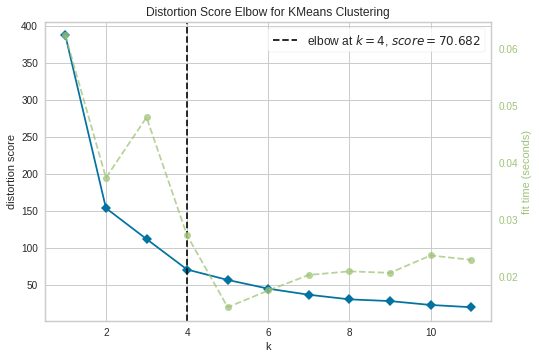

In [13]:
kmeans = KMeans()
yellow_visualizer = KElbowVisualizer(kmeans, k=(1,12))
yellow_visualizer.fit(df_std)
yellow_visualizer.show()

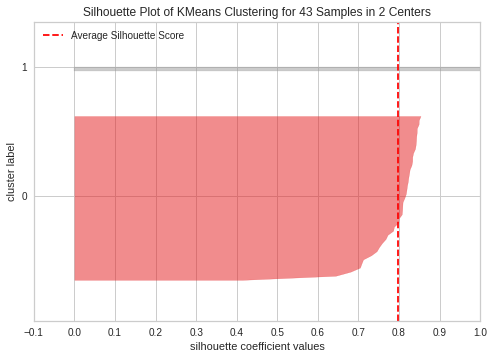

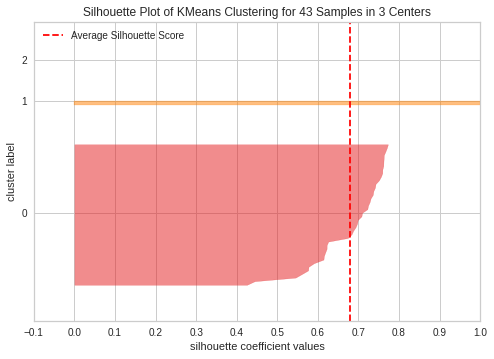

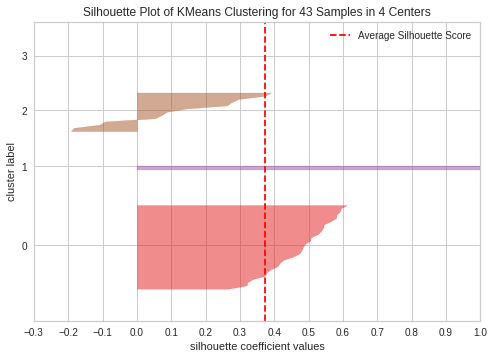

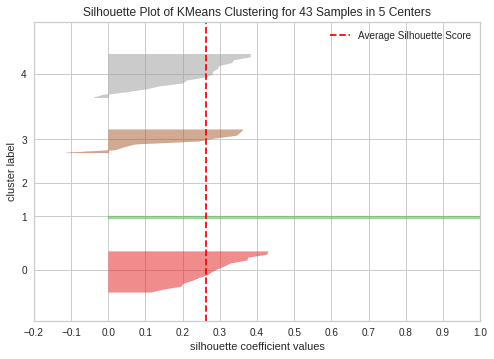

In [14]:
for i in range(2,6):
  kmeans = KMeans(n_clusters=i)
  yellow_visualizer = SilhouetteVisualizer(kmeans)
  yellow_visualizer.fit(df_std)
  yellow_visualizer.show()

## MinMax Scaler

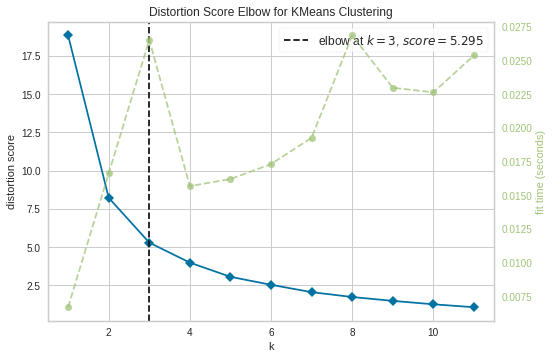

In [15]:
kmeans = KMeans()
yellow_visualizer = KElbowVisualizer(kmeans, k=(1,12))
yellow_visualizer.fit(df_mmax)
yellow_visualizer.show()

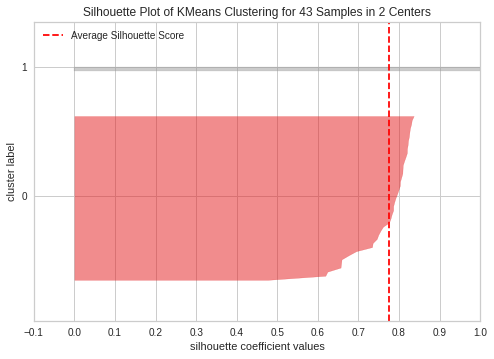

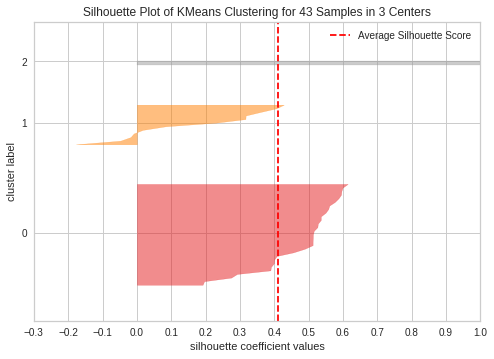

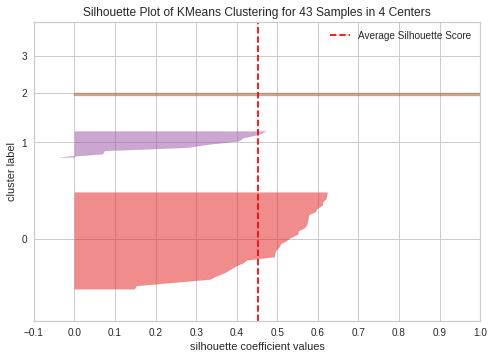

In [16]:
for i in range(2,5):
  kmeans = KMeans(n_clusters=i)
  yellow_visualizer = SilhouetteVisualizer(kmeans)
  yellow_visualizer.fit(df_mmax)
  yellow_visualizer.show()

## KMeans

In [17]:
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(df_std)

In [18]:
df['cluster'] = clusters

In [23]:
df.head(6)

,População,PIB pc,salario medio mensal,area_territorial_2021,% Industrial (Em MWh),% Comércio e Serviços (Em MWh),% Rural (Em MWh),% Residencial (Em MWh),% Iluminação e Serviços Públicos e Outros (Em MWh),cluster,cidade
0,11253503,62341.21,41,1521202,14100892,53693815,11688,55022364,15128338,1,São Paulo - Mirante de Santana
1,343937,40668.42,26,667684,839421,1332884,46810,1823814,599509,2,Bauru
2,47789,25312.30,18,289981,78357,202459,3088,275909,79337,2,Campos do Jordão
3,207610,36663.15,24,560637,387760,953907,39779,1117855,402754,2,Presidente Prudente
4,318640,28787.49,20,605679,686909,708625,42331,1558035,515551,2,Franca
5,221950,46832.89,31,1136907,1863293,692404,127274,1188384,513757,0,São Carlos


In [22]:
cidades = df1['Nome da base ONS']
df['cidade'] = cidades
df_clusters = df[['cidade', 'cluster']]
df_clusters.head(6)

,cidade,cluster
0,São Paulo - Mirante de Santana,1
1,Bauru,2
2,Campos do Jordão,2
3,Presidente Prudente,2
4,Franca,2
5,São Carlos,0


In [21]:
#df_clusters = df_clusters.to_excel('/content/drive/MyDrive/df_clusters.xlsx', index=False)